In [7]:
import pandas as pd

books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books.csv")
ratings = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data/ratings.csv")
to_read = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data/to_read.csv")
book_tags = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\book_tags.csv")
tags = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data/tags.csv")

# Preview
print(books.head())
print(ratings.head())
print(book_tags.head())


   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Ph

In [8]:
print(books.isnull().sum())
print(ratings.duplicated().sum())
print(to_read.isnull().sum())


id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64
1644
user_id    0
book_id    0
dtype: int64


In [9]:
print("Total Books:", books['book_id'].nunique())
print("Total Users:", ratings['user_id'].nunique())
print("Total Ratings:", ratings.shape[0])


Total Books: 10000
Total Users: 53424
Total Ratings: 981756


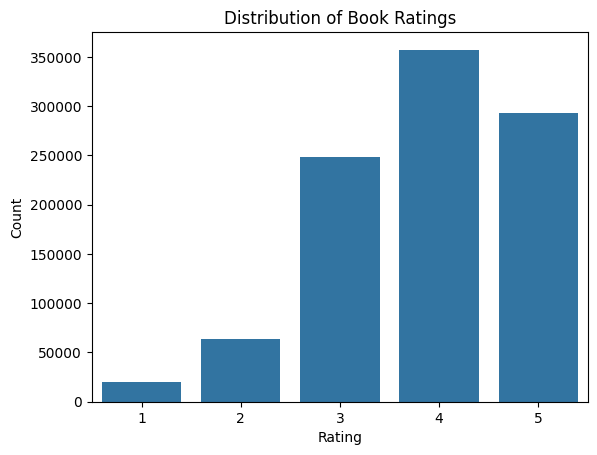

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="rating", data=ratings)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [11]:
most_rated = ratings.groupby("book_id").size().sort_values(ascending=False).head(10)
top_books = books[books['book_id'].isin(most_rated.index)]
print(top_books[['title', 'authors']])


                                                  title  \
1     Harry Potter and the Sorcerer's Stone (Harry P...   
17    Harry Potter and the Prisoner of Azkaban (Harr...   
20    Harry Potter and the Order of the Phoenix (Har...   
23    Harry Potter and the Goblet of Fire (Harry Pot...   
26    Harry Potter and the Half-Blood Prince (Harry ...   
3274  Harry Potter Boxed Set, Books 1-5 (Harry Potte...   

                                      authors  
1                 J.K. Rowling, Mary GrandPré  
17    J.K. Rowling, Mary GrandPré, Rufus Beck  
20                J.K. Rowling, Mary GrandPré  
23                J.K. Rowling, Mary GrandPré  
26                J.K. Rowling, Mary GrandPré  
3274              J.K. Rowling, Mary GrandPré  


In [12]:
ratings_count = ratings.groupby("book_id").size()
avg_ratings = ratings.groupby("book_id")["rating"].mean()
combined = pd.DataFrame({'count': ratings_count, 'avg_rating': avg_ratings})
top_rated = combined[combined['count'] > 100].sort_values(by="avg_rating", ascending=False).head(10)

# Join with book titles
print(top_rated.merge(books, on="book_id")[['title', 'authors', 'avg_rating']])


Empty DataFrame
Columns: [title, authors, avg_rating]
Index: []


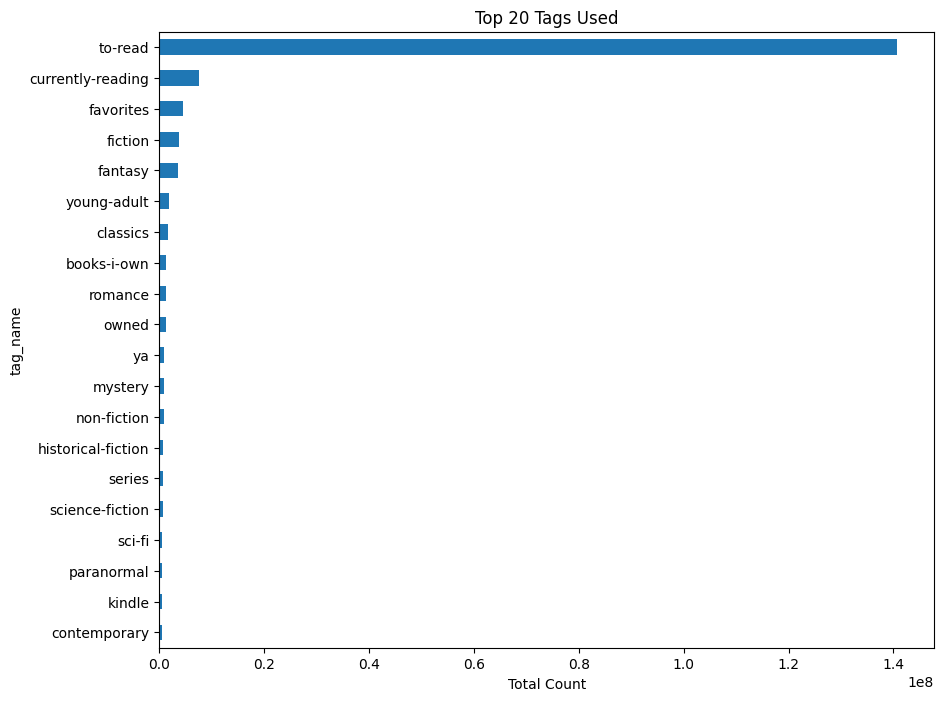

In [13]:
merged_tags = book_tags.merge(tags, on="tag_id")
tag_counts = merged_tags.groupby("tag_name")["count"].sum().sort_values(ascending=False).head(20)

tag_counts.plot(kind="barh", figsize=(10, 8))
plt.title("Top 20 Tags Used")
plt.xlabel("Total Count")
plt.gca().invert_yaxis()
plt.show()


In [14]:
to_read_counts = to_read["book_id"].value_counts().head(10)
top_to_read_books = books[books["book_id"].isin(to_read_counts.index)]
print(top_to_read_books[["title", "authors"]])


                                                 title        authors
53   The Hitchhiker's Guide to the Galaxy (Hitchhik...  Douglas Adams
336      The Ultimate Hitchhiker's Guide to the Galaxy  Douglas Adams


In [15]:
top_authors = books["authors"].value_counts().head(10)
print(top_authors)


authors
Stephen King       60
Nora Roberts       59
Dean Koontz        47
Terry Pratchett    42
Agatha Christie    39
Meg Cabot          37
James Patterson    36
David Baldacci     34
John Grisham       33
J.D. Robb          33
Name: count, dtype: int64
